In [1]:
import numpy as np
from random import *
import matplotlib.pyplot as plt
import scipy

Defininf the adjacency matrix of the cycle and initializing

In [2]:
N = 5


def build_adj_n_cycle(n):
    matrix = []
    for i in range(n):
        matrix.append([])
    for i in range(n):
        for j in range(n):
            if j == i - 1 or j == i + 1:
                matrix[i].append(0.5)
            elif i == 0 and j == n - 1:
                matrix[i].append(0.5)
            elif i == n - 1 and j == 0:
                matrix[i].append(0.5)
            else:
                matrix[i].append(0)
    return np.matrix(matrix)


def initialize_state(i, n):
    init_state = []
    for j in range(n):
        init_state.append([])
    for j in range(n):
        if j == i:
            init_state[j].append(1)
        else:
            init_state[j].append(0)
    return np.matrix(init_state)


Defining the walk

In [3]:
def evolution(c, s, T):
    s_t = s
    for t in range(T):
        s_t = c * s_t
    return s_t


Defining variation distance and mixing time

In [4]:
def variation_distance(a, b):
    a_0 = a.transpose()
    # b_0 = b.transpose()
    a_1 = a_0.tolist()
    # b_1 = b_0.tolist()
    a_2 = []
    # b_2 = []
    for i in a_1[0]:
        a_2.append(i)
    # for i in b_1[0]:
    #    b_2.append(i)
    ab = []
    for i in range(len(a_2)):
        ab.append(abs(a_2[i] - b[i]))
    return sum(ab)


def calc_mixing_time(b, c, s, T, epsilon):
    s_t = s
    loops = 0
    for t in range(T):
        s_t = c * s_t
        if variation_distance(s_t, b) <= epsilon:
            return int(t)
        else:
            loops += 1
            if loops == T - 1:
                return int(-1)
            else:
                pass

Plot the distribution on the vertexes

In [5]:
def plot_distr():
    tot_T = 30
    eps = 0.1 / N
    A = build_adj_n_cycle(N)
    s_0 = initialize_state(1, N)
    final_state = evolution(A, s_0, tot_T)
    pi = []
    for i in range(N):
        pi.append(1 / N)
    print(calc_mixing_time(pi, A, s_0, tot_T, eps))

    x = [i for i in range(N)]
    y_0 = final_state.transpose()
    y_1 = y_0.tolist()
    y = []
    for i in y_1[0]:
        y.append(i)

    fig, ax = plt.subplots()
    ax.plot(x, y, label="Current probability distribution")
    ax.plot(x, pi, "k:", label="Limiting distribution")
    legend = ax.legend(loc="upper center")
    legend.get_frame().set_facecolor("C0")
    ax.set_ylim(0, 1)
    plt.xlabel("Vertex")
    plt.ylabel("Probability")

    plt.show()


19


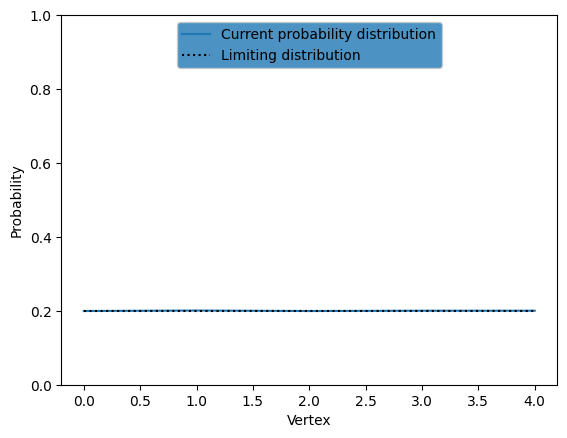

In [7]:
plot_distr()

Function to get the mixing times

In [8]:
def mixing_times():
    # Ns = [i for i in range(5, 50, 2)]
    Ns = [(2 * i + 1) for i in range(2, 10, 1)]
    T = 1000
    y = []
    # ub = []
    for i in Ns:
        As = build_adj_n_cycle(i)
        s_0s = initialize_state(1, i)
        # epss = 0.1 / i
        epss = 0.1
        pis = []
        for j in range(i):
            pis.append(1 / i)
        y.append(calc_mixing_time(pis, As, s_0s, T, epss))
        # ub.append(upper_bound(i, 0.1 / i))
    ub = []
    for i in range(len(Ns)):
        ub.append(Ns[i] ** 2)
    lb = []
    for i in range(len(Ns)):
        lb.append(Ns[i])
    with open("data_CW_C,txt", "w") as f:
        for i in range(len(Ns)):
            f.write(str(Ns[i]))
            f.write(",")
            f.write(str(y[i]))
            f.write("\n")
    # theta = []
    # for i in Ns:
    #    theta.append(np.log(1 / 0.001) * i * i)
    fig, ax = plt.subplots()
    ax.plot(Ns, y, label="Computed mixing time", color="blue")
    ax.plot(Ns, ub, "k:", label="Upper bound", color="red")
    ax.plot(Ns, lb, "k:", label="Lower bound", color="green")
    # ax.plot(Ns, theta, "k:", label="Expected", color="pink")
    legend = ax.legend(loc="upper center")
    legend.get_frame().set_facecolor("C0")
    # plt.plot(Ns, y)
    plt.grid(linestyle="--", linewidth=0.5)
    plt.xlabel("Number of vertexes")
    plt.ylabel("Mixing Time")
    plt.show()

/var/folders/jk/jgkdl6hx493bhb_hd6fkl9q00000gn/T/ipykernel_25994/2890518352.py:34: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k:" (-> color='k'). The keyword argument will take precedence.
  ax.plot(Ns, ub, "k:", label="Upper bound", color="red")
/var/folders/jk/jgkdl6hx493bhb_hd6fkl9q00000gn/T/ipykernel_25994/2890518352.py:35: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k:" (-> color='k'). The keyword argument will take precedence.
  ax.plot(Ns, lb, "k:", label="Lower bound", color="green")


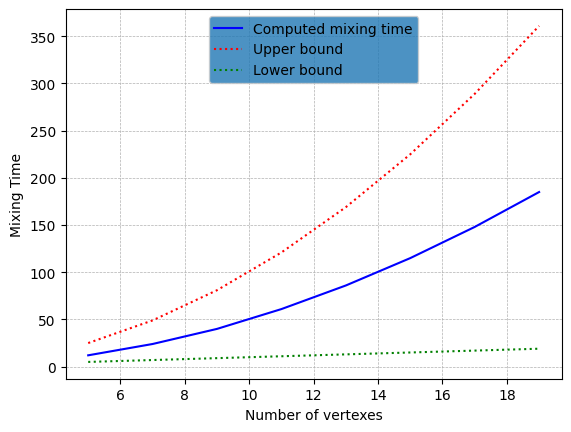

In [9]:
mixing_times()